# Module End Project

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1.How many are there in each Team and the percentage splitting with respect to the total employees.

2.Segregate the employees w.r.t different positions.

3.Find from which age group most of the employees belong to.

4.Find out under which team and position, spending in terms of salary is high.

5.Find if there is any correlation between age and salary , represent it visually.

Before doing the above questions,perform pre processing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

#  EDA- Exploratory Data Analysis on employees dataset of ABC company.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df=pd.read_csv('project.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Summary of data frame

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


### Statistical summary

In [137]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


###  Null values in the table

In [138]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

### Replacing null values

In [139]:
df['College'].fillna('Unknown',inplace=True)
df['Salary'].fillna(0,inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Duplicate values

In [140]:
df.duplicated().sum()

0

### Display the column names

In [141]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

### Unique values and its count

In [142]:
df.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [143]:
df.Team.nunique()

30

In [144]:
df.Number.unique()

array([ 0, 99, 30, 28,  8, 90, 55, 41, 12, 36,  7,  4, 11, 13, 44, 22, 21,
       24,  2, 10,  6,  1, 33, 14, 15, 17, 43,  3,  9, 42, 18, 23,  5, 39,
       31, 35, 20, 92, 54, 19, 40, 34, 45, 32, 25, 50, 37, 26, 16, 52, 27,
       77, 88], dtype=int64)

In [145]:
df.Number.nunique()

53

In [146]:
df.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [147]:
df.Age.unique()

array([25, 27, 22, 29, 21, 24, 20, 26, 28, 32, 23, 30, 33, 34, 37, 36, 31,
       38, 39, 19, 35, 40], dtype=int64)

In [148]:
df.Age.nunique()

22

In [149]:
df.Height.unique()

array(['06-Feb', '06-Jun', '06-May', '06-Oct', '06-Sep', '06-Aug', '7-0',
       '06-Apr', '05-Sep', '06-Jul', '06-Mar', '05-Nov', '06-Nov',
       '07-Mar', '6-0', '07-Feb', '06-Jan', '07-Jan'], dtype=object)

In [150]:
df.Height.nunique()

18

In [151]:
df.Weight.unique()

array([180, 235, 205, 185, 231, 240, 238, 190, 220, 260, 215, 253, 216,
       200, 208, 219, 175, 275, 237, 248, 221, 210, 195, 255, 250, 278,
       254, 201, 245, 228, 206, 212, 194, 225, 265, 230, 192, 273, 251,
       270, 209, 189, 242, 213, 186, 161, 191, 232, 198, 193, 233, 218,
       179, 172, 279, 188, 222, 243, 229, 246, 234, 257, 249, 217, 202,
       252, 226, 165, 227, 239, 203, 170, 290, 199, 289, 184, 169, 207,
       183, 280, 214, 241, 223, 307, 244, 173, 256], dtype=int64)

In [152]:
df.Weight.nunique()

87

In [153]:
df.College.unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State',
       'Unknown', 'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State',
       'Ohio State', 'Washington', 'Kentucky', 'North Carolina',
       'Arizona', 'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford',
       'Syracuse', 'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M',
       'UCLA', 'UNLV', 'Wichita State', "Saint Joseph's", 'Notre Dame',
       'Norfolk State', 'Duke', 'Murray State', 'Tennessee State',
       'Bowling Green', 'Purdue', 'Wake Forest', 'Michigan', 'Missouri',
       'USC', 'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson',
       'Vanderbilt', 'Michigan State', 'Florida', 'Washington State',
       'Arizona State', 'Oklahoma', 'Wyoming', "St. John's", 'Maryland',
       'Wisconsin', 'Utah Valley', 'North Carolina State',
       'UC Santa Barbara', 'Baylor', 'Connecticut', 'Oregon State',
       'New Mexico', 'Oregon', 'Creighton', 'Arkansas', 'Memphis',
       "Saint Mary's", 'Tennessee', 'Al

In [154]:
df.College.nunique()

119

In [155]:
df.Salary.unique()

array([ 7730337.,  6796117.,        0.,  1148640.,  5000000., 12000000.,
        1170960.,  2165160.,  1824360.,  3431040.,  2569260.,  6912869.,
        3425510.,  1749840.,  2616975.,   845059.,  1500000.,  1335480.,
        6300000.,  1599840.,   134215., 19689000.,  1140240.,   947276.,
         981348., 11235955.,  8000000.,  1635476.,    30888., 22875000.,
        7402812.,  1572360., 12650000.,  3750000.,  4131720.,  2814000.,
        1636842.,  4000000.,   167406.,  1000000.,  4626960.,  1074169.,
        6500000.,  2144772.,   525093.,  3457800.,  4582680.,  2869440.,
        1524000., 13600000., 10050000.,  2500000.,  7000000.,  1842000.,
        6268675.,   650000.,  3553917.,  2900000.,   245177.,  4660482.,
        1509360.,  3873398., 13800000., 11370786.,  2008748., 14260870.,
       11710456.,  5543725.,  1131960.,  1270964.,  3815000., 15501000.,
         289755.,  1100602.,   111444.,  5675000.,  9650000., 18907726.,
       21468695.,  3376000.,   947726.,  7085000., 

In [156]:
df.Salary.nunique()

310

## correcting height column

In [157]:
df.Height.unique()

array(['06-Feb', '06-Jun', '06-May', '06-Oct', '06-Sep', '06-Aug', '7-0',
       '06-Apr', '05-Sep', '06-Jul', '06-Mar', '05-Nov', '06-Nov',
       '07-Mar', '6-0', '07-Feb', '06-Jan', '07-Jan'], dtype=object)

In [158]:
df['Height']=np.random.randint(150,180,len(df))
df['Height']

0      175
1      150
2      173
3      154
4      162
      ... 
453    153
454    157
455    153
456    173
457    174
Name: Height, Length: 458, dtype: int32

In [159]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,175,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,150,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,173,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,154,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,162,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,153,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,157,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,153,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,173,231,Kansas,947276.0


## >How many are there in each Team and the percentage splitting with respect to the total employees.

### Employees in each Team

In [160]:
team_c=df['Team'].value_counts()
team_c

New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

In [161]:
#total employees
emp_c=458

### its converts to Percentage

In [162]:
percentage=round((team_c/emp_c)*100,2)
percentage

New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: Team, dtype: float64

### Display the DataFrame

In [163]:
percentage.name='Percentage'
team_c.name='No:of Employee'
data= pd.concat([team_c,percentage], axis=1)
pd.DataFrame(data)

,No:of Employee,Percentage
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28
Washington Wizards,15,3.28


### Display the BAR plot of above DataFrame(percentage by team)

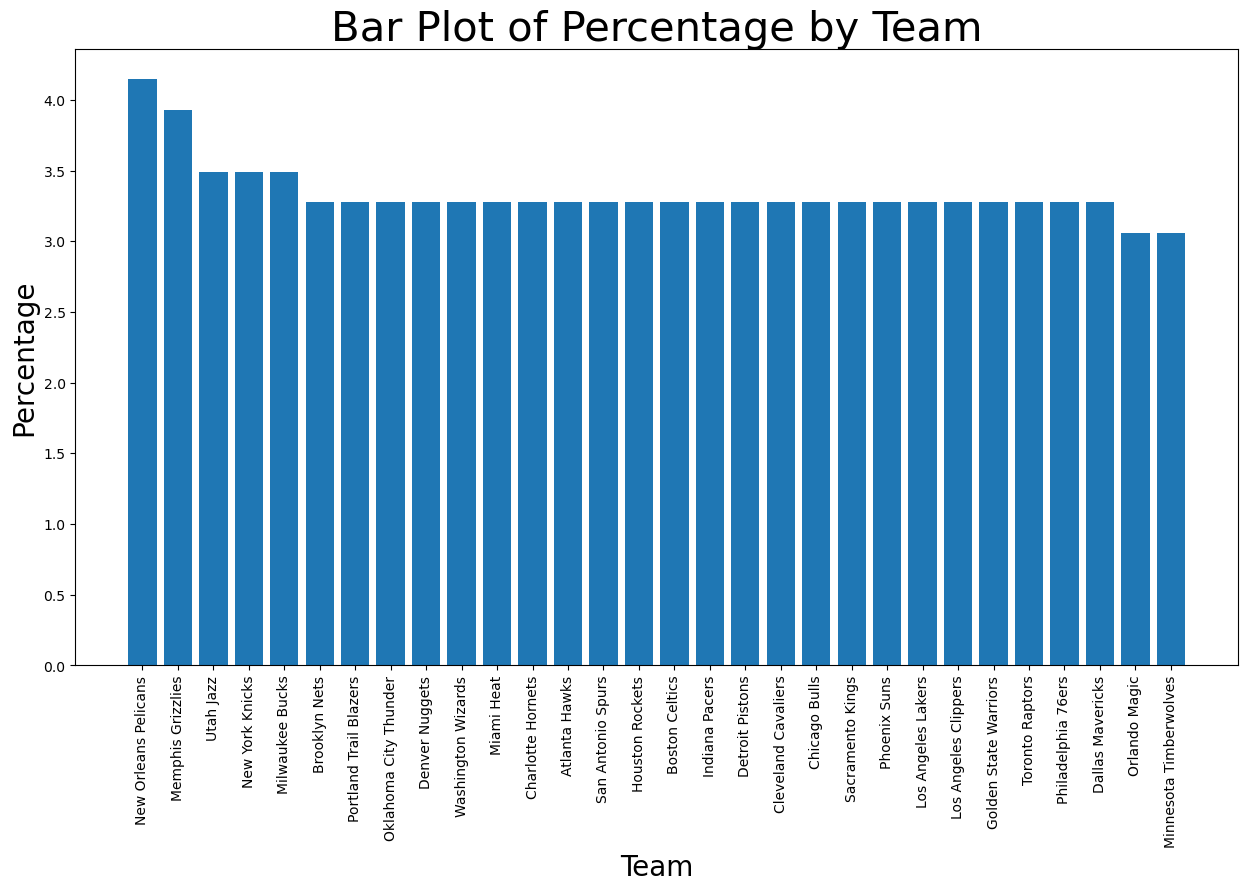

In [164]:
plt.figure(figsize=(15,8))
plt.bar(percentage.index,percentage.values)
plt.xticks(rotation="vertical")
plt.title('Bar Plot of Percentage by Team',fontsize=30)
plt.xlabel('Team',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.show()

## >Segregate the employees w.r.t different positions.

In [165]:
p1=pd.Series(df['Position'].value_counts())
p1

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


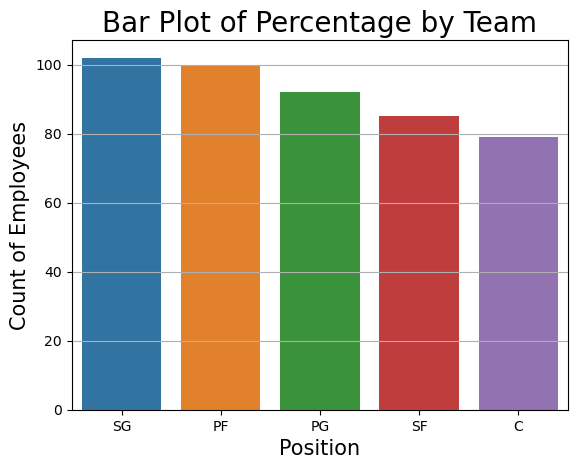

In [166]:
plt.grid()
sns.barplot(p1.index,p1.values)
plt.title('Bar Plot of Percentage by Team',fontsize=20)
plt.xlabel('Position',fontsize=15)
plt.ylabel('Count of Employees',fontsize=15)
plt.show()


In [167]:
df[['Position','Name']]

,Position,Name
0,PG,Avery Bradley
1,SF,Jae Crowder
2,SG,John Holland
3,SG,R.J. Hunter
4,PF,Jonas Jerebko
...,...,...
453,PG,Shelvin Mack
454,PG,Raul Neto
455,C,Tibor Pleiss
456,C,Jeff Withey


In [168]:
print('Employee list in SG Position \n',df.loc[df['Position']== 'SG','Name'])

Employee list in SG Position 
 2          John Holland
3           R.J. Hunter
12          Evan Turner
13          James Young
15     Bojan Bogdanovic
             ...       
433    Gerald Henderson
437       C.J. McCollum
438        Luis Montero
444          Alec Burks
449         Rodney Hood
Name: Name, Length: 102, dtype: object


In [169]:
print('Total Number of Employees in SG Position is :',df.loc[df['Position']== 'SG','Name'].count())

Total Number of Employees in SG Position is : 102


In [170]:
print('Employee list in PF Position \n',df.loc[df['Position']== 'PF','Name'])

Employee list in PF Position 
 4         Jonas Jerebko
5          Amir Johnson
6         Jordan Mickey
24     Chris McCullough
25          Willie Reed
             ...       
435      Meyers Leonard
441         Noah Vonleh
442       Trevor Booker
446      Derrick Favors
452          Trey Lyles
Name: Name, Length: 100, dtype: object


In [171]:
print('Total Number of Employees in PF Position is :',df.loc[df['Position']== 'PF','Name'].count())

Total Number of Employees in PF Position is : 100


In [172]:
print('Employee list in PG Position \n',df.loc[df['Position']== 'PG','Name'])

Employee list in PG Position 
 0      Avery Bradley
8       Terry Rozier
9       Marcus Smart
11     Isaiah Thomas
19      Jarrett Jack
           ...      
440    Brian Roberts
443       Trey Burke
445       Dante Exum
453     Shelvin Mack
454        Raul Neto
Name: Name, Length: 92, dtype: object


In [173]:
print('Total Number of Employees in PG Position is :',df.loc[df['Position']== 'PG','Name'].count())

Total Number of Employees in PG Position is : 92


In [174]:
print('Employee list in SF Position \n',df.loc[df['Position']== 'SF','Name'])

Employee list in SF Position 
 1                 Jae Crowder
32     Thanasis Antetokounmpo
33            Carmelo Anthony
35           Cleanthony Early
42               Lance Thomas
                ...          
428           Al-Farouq Aminu
432          Maurice Harkless
448            Gordon Hayward
450                Joe Ingles
451             Chris Johnson
Name: Name, Length: 85, dtype: object


In [175]:
print('Total Number of Employees in SF Position is :',df.loc[df['Position']== 'SF','Name'].count())

Total Number of Employees in SF Position is : 85


In [176]:
print('Employee list in C Position \n',df.loc[df['Position']== 'C','Name'])

Employee list in C Position 
 7         Kelly Olynyk
10     Jared Sullinger
14        Tyler Zeller
23         Brook Lopez
27          Henry Sims
            ...       
439      Mason Plumlee
447        Rudy Gobert
455       Tibor Pleiss
456        Jeff Withey
457           Priyanka
Name: Name, Length: 79, dtype: object


In [177]:
print('Total Number of Employees in C Position is :',df.loc[df['Position']== 'C','Name'].count())

Total Number of Employees in C Position is : 79


## >Find from which age group most of the employees belong to.

In [178]:
age=df['Age'].value_counts().sort_values()
age

19     2
39     2
40     3
38     4
37     4
35     9
36    10
34    10
32    13
33    14
21    19
20    19
31    22
22    26
29    28
30    31
28    31
26    36
23    41
27    41
25    46
24    47
Name: Age, dtype: int64

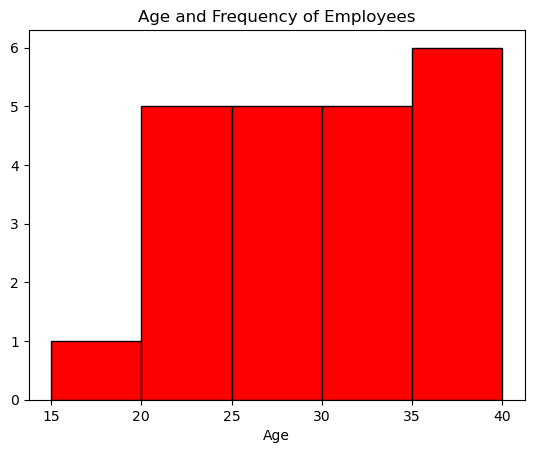

In [179]:
plt.hist(age.index,bins=[15,20,25,30,35,40],color='red',edgecolor='black')
plt.xlabel('Age')
plt.title('Age and Frequency of Employees')
plt.show()

#### Data Story: Most number of employees are in between 35-40

## >Find out under which team and position, spending in terms of salary is high.

In [180]:
a1=df[['Team','Position','Salary']]
a1

,Team,Position,Salary
0,Boston Celtics,PG,7730337.0
1,Boston Celtics,SF,6796117.0
2,Boston Celtics,SG,0.0
3,Boston Celtics,SG,1148640.0
4,Boston Celtics,PF,5000000.0
...,...,...,...
453,Utah Jazz,PG,2433333.0
454,Utah Jazz,PG,900000.0
455,Utah Jazz,C,2900000.0
456,Utah Jazz,C,947276.0


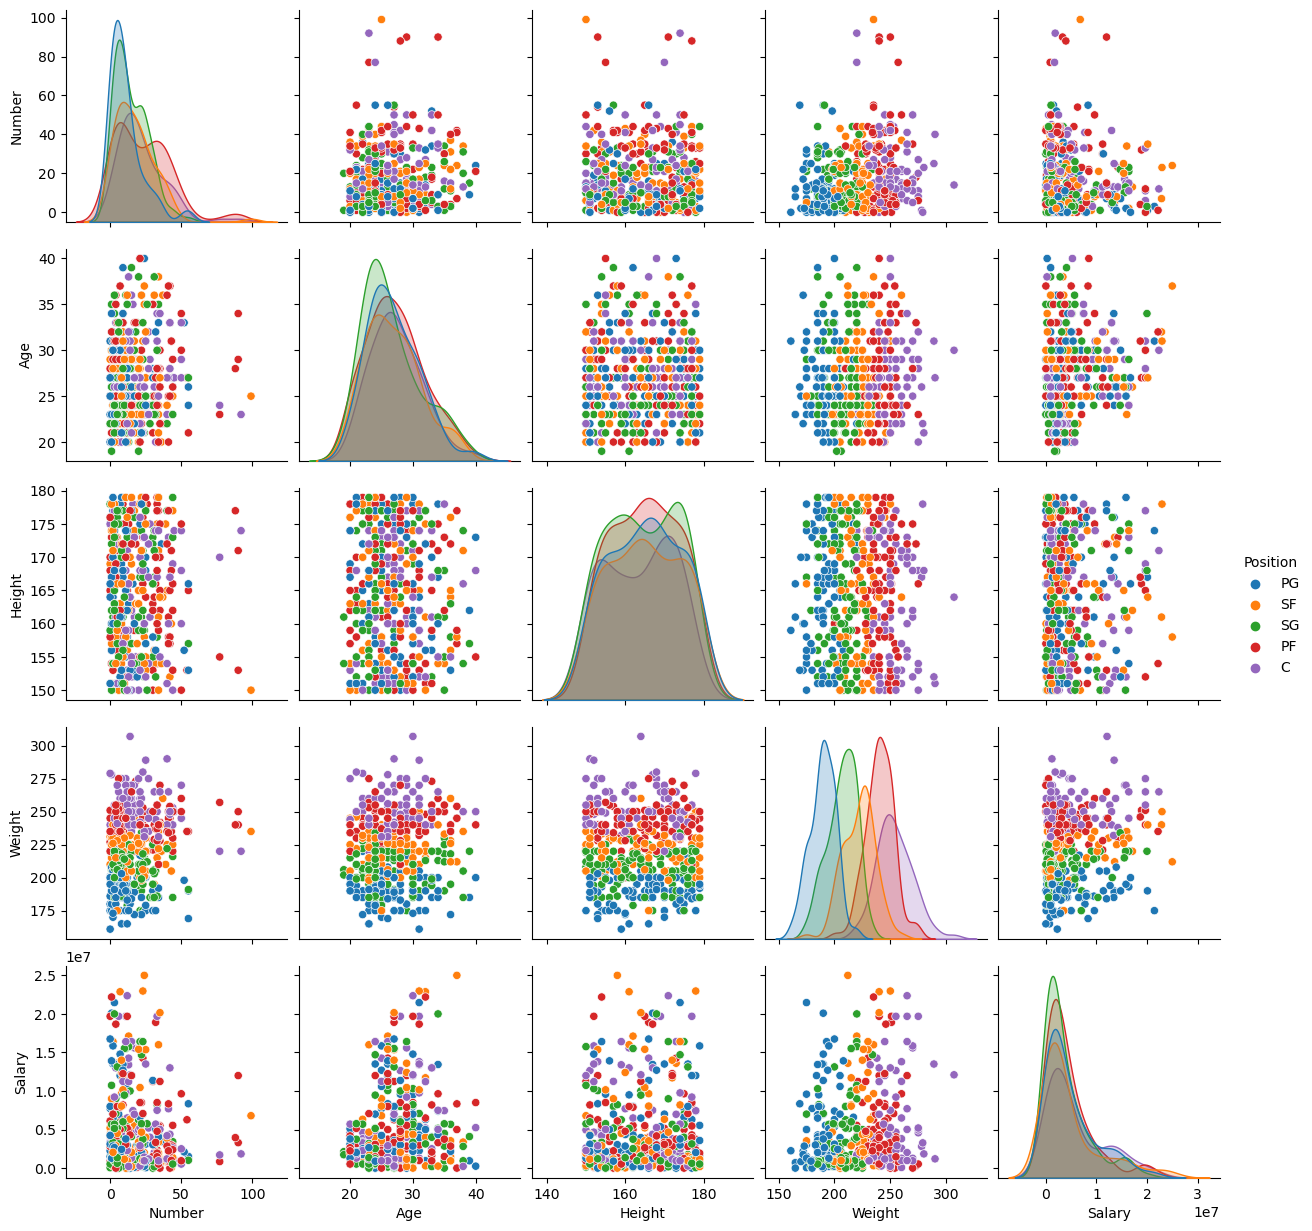

In [181]:
sns.pairplot(df,hue='Position')
plt.show()

In [182]:
a11 = a1.groupby(['Team', 'Position'])['Salary'].sum()
a11

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [183]:
a11.sort_values(ascending=False).head()

Team                Position
Los Angeles Lakers  SF          31866445.0
Miami Heat          PF          31538671.0
Houston Rockets     SG          28122883.0
Phoenix Suns        PG          28002998.0
Denver Nuggets      SF          27982771.0
Name: Salary, dtype: float64

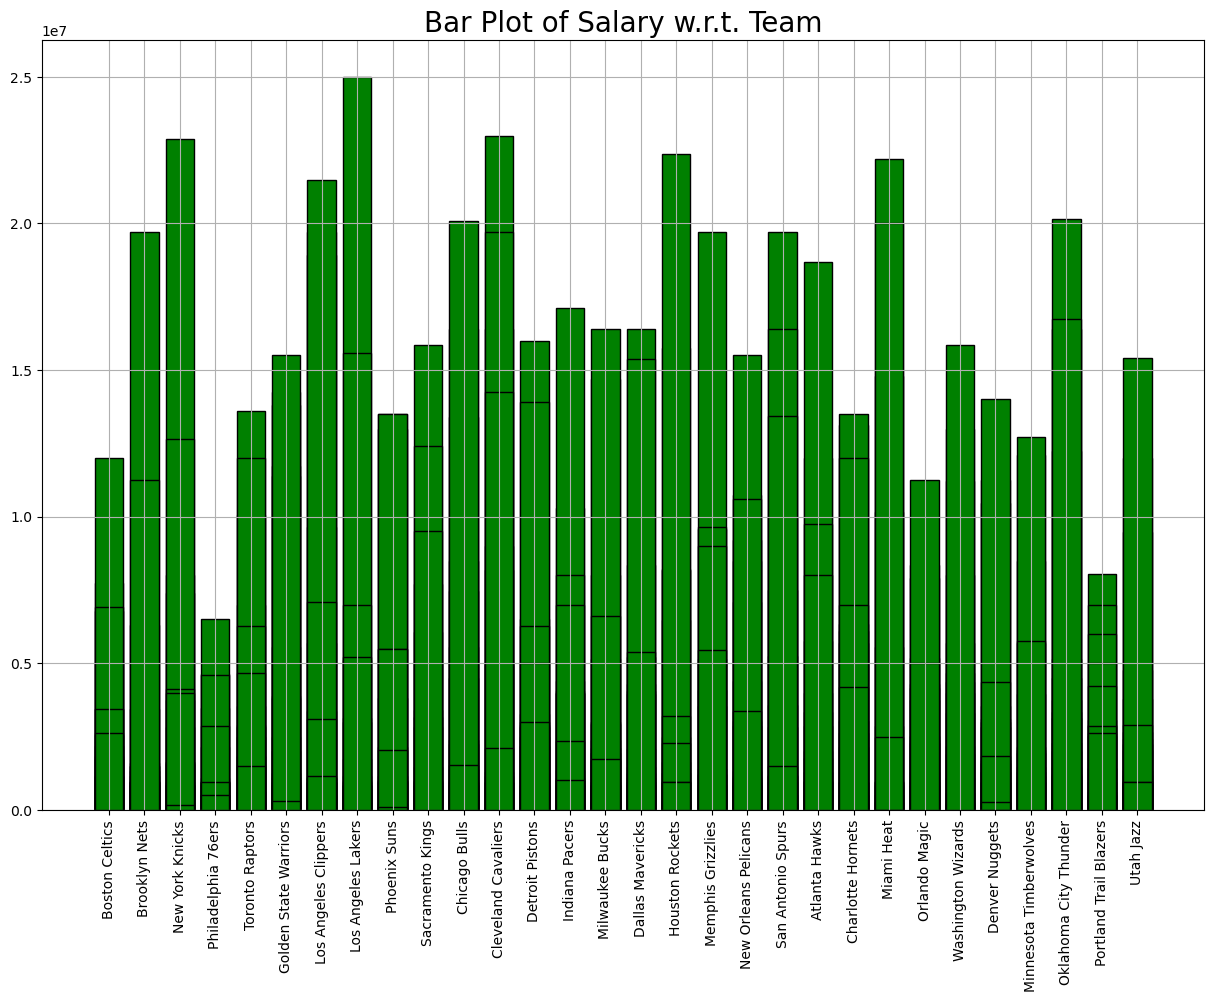

In [184]:
plt.figure(figsize=(15,10))
plt.bar(df['Team'],df['Salary'],color='g',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Bar Plot of Salary w.r.t. Team',fontsize=20)
plt.grid()
plt.show()

## >Find if there is any correlation between age and salary , represent it visually.

In [185]:
data=df[["Age","Height","Weight","Salary"]]
data

,Age,Height,Weight,Salary
0,25,175,180,7730337.0
1,25,150,235,6796117.0
2,27,173,205,0.0
3,22,154,185,1148640.0
4,29,162,231,5000000.0
...,...,...,...,...
453,26,153,203,2433333.0
454,24,157,179,900000.0
455,26,153,256,2900000.0
456,26,173,231,947276.0


In [186]:
cor=data.corr()
cor

,Age,Height,Weight,Salary
Age,1.000000,-0.052979,0.086806,0.205010
Height,-0.052979,1.000000,-0.037925,-0.009642
Weight,0.086806,-0.037925,1.000000,0.141430
Salary,0.205010,-0.009642,0.141430,1.000000


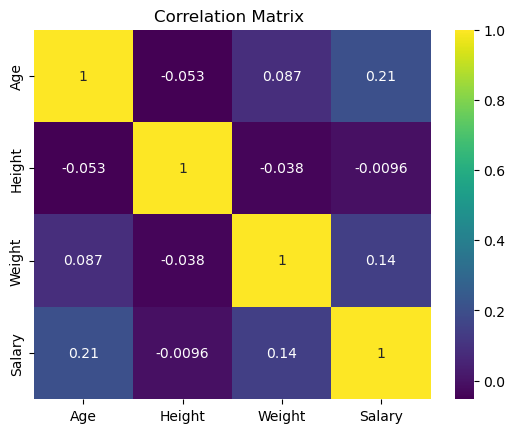

In [187]:
sns.heatmap(cor, annot=True, cmap="viridis")
plt.title("Correlation Matrix ")
plt.show()

## Conclusion

#### Replaced incorrect height data with random values.
#### Identified how many employees are in each team and their percentage.
#### Segregated employees by their positions.
#### Determined the most common age group among the employees.
#### Found which team and position combo has the highest salary spending.
#### Visualized and calculated the correlation between age and salary.
#### Each of these steps provides valuable insights into the company's workforce composition, salary distribution, and age demographics, aiding in strategic planning and resource allocation.